In [378]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,10)
import seaborn as sns

In [379]:
# Load the dataset
df = pd.read_csv('..\\data\\Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [380]:
df.shape

(13320, 9)

In [381]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [382]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


## Data exploration

array([[<AxesSubplot:title={'center':'bath'}>,
        <AxesSubplot:title={'center':'balcony'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>]],
      dtype=object)

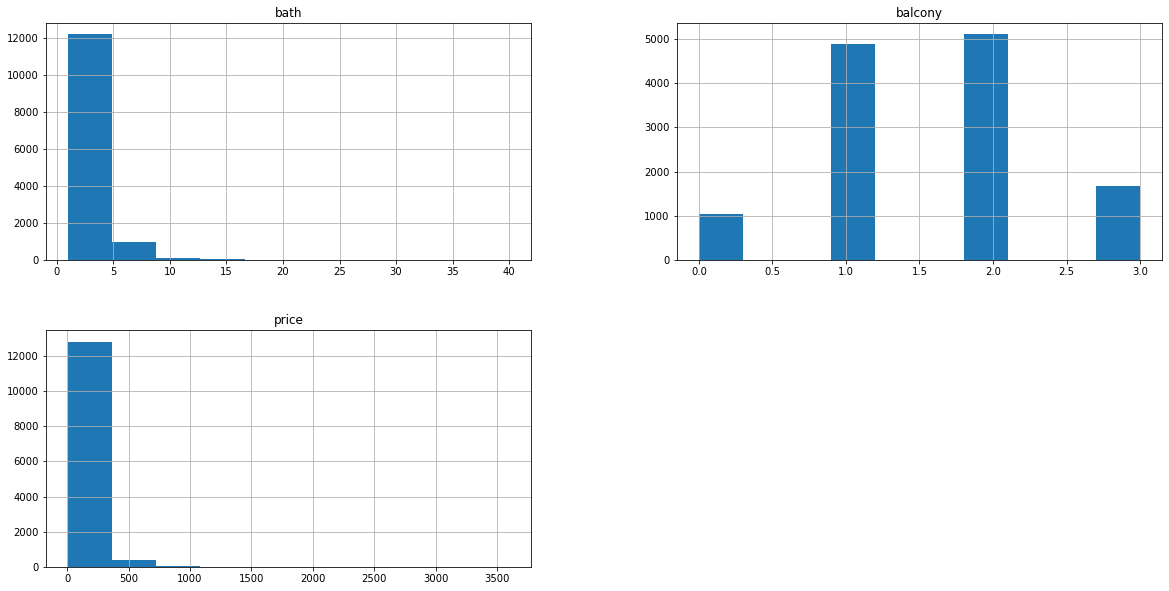

In [383]:
df.hist(figsize=(20,10))

In [384]:
df.isnull().sum()
# society has high missing values, we can think of dropping that feature

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

### Area type

In [385]:
df.area_type.value_counts(normalize=True)*100
# more than 50% of the values are super built-up area

Super built-up  Area    65.990991
Built-up  Area          18.153153
Plot  Area              15.202703
Carpet  Area             0.653153
Name: area_type, dtype: float64

Text(0.5, 1.0, 'Count of Area Type')

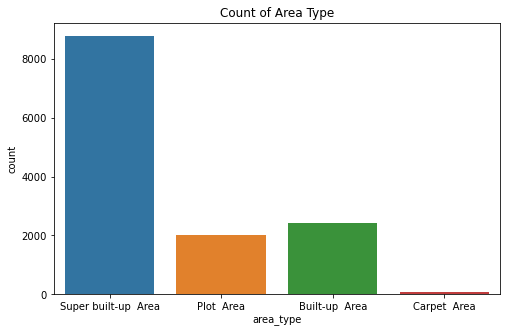

In [386]:
plt.figure(figsize=(8,5))

sns.countplot(data=df, x='area_type')
plt.title('Count of Area Type')

### Availability

In [387]:
df.availability.value_counts(normalize=True)
# approx 80% of the houses are ready to move

Ready To Move    0.794369
18-Dec           0.023048
18-May           0.022147
18-Apr           0.020345
18-Aug           0.015015
                   ...   
16-Jul           0.000075
17-Jan           0.000075
16-Oct           0.000075
15-Jun           0.000075
16-Nov           0.000075
Name: availability, Length: 81, dtype: float64

### Location

In [388]:
print(df.location.nunique())
print(df.location.value_counts())
# we have to do some data manipulation to reduce the cardinality of this feature

1305
Whitefield                         540
Sarjapur  Road                     399
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
Viviani Road                         1
Narayanappa Layout                   1
Nagarbhavi Garden Villas Layout      1
LIC Colony                           1
SARJAPUR BAGALUR ROAD                1
Name: location, Length: 1305, dtype: int64


### Size

In [389]:
df['size'].nunique()

31

Text(0.5, 1.0, 'Count of plot size')

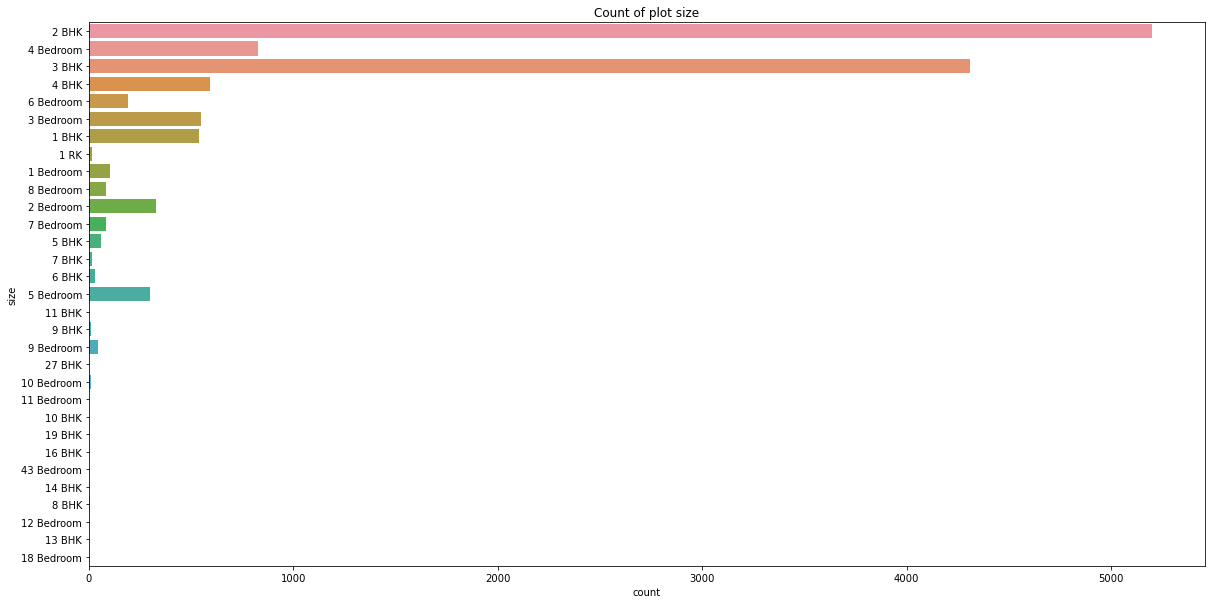

In [390]:
sns.countplot(data=df, y='size')
plt.title('Count of plot size')
# 2 BHK and 2 Bedroom are supposed to mean the same thing, we should take care of this at feature engineering stage

### Society

In [391]:
print(df['society'].nunique())
print(df['society'].value_counts(dropna=True))
# we can think of dropping this column as it has high cardinality and missing values

2688
GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Krberl      1
SVdhaig     1
IJent A     1
DSthian     1
KlarkBe     1
Name: society, Length: 2688, dtype: int64


### Total square feet

In [392]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [393]:
df['total_sqft'][30]
# this feature contains values in different units, even in ranges

'2100 - 2850'

### bath

In [394]:
df['bath'].describe()

count    13247.000000
mean         2.692610
std          1.341458
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         40.000000
Name: bath, dtype: float64

Text(0.5, 1.0, 'Count of bathrooms')

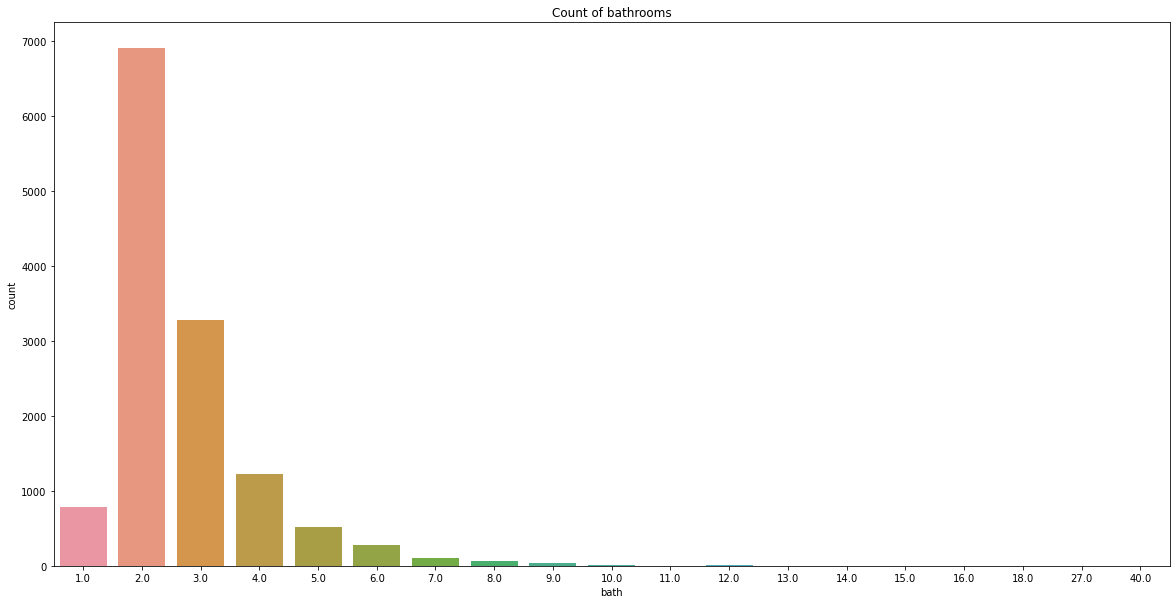

In [395]:
sns.countplot(data=df, x='bath')
plt.title('Count of bathrooms')

In [396]:
df['bath'].value_counts().sort_index()

1.0      788
2.0     6908
3.0     3286
4.0     1226
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
11.0       3
12.0       7
13.0       3
14.0       1
15.0       1
16.0       2
18.0       1
27.0       1
40.0       1
Name: bath, dtype: int64

### Balcony

In [397]:
df['balcony'].value_counts(dropna=True)

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

Text(0.5, 1.0, 'count of balcony')

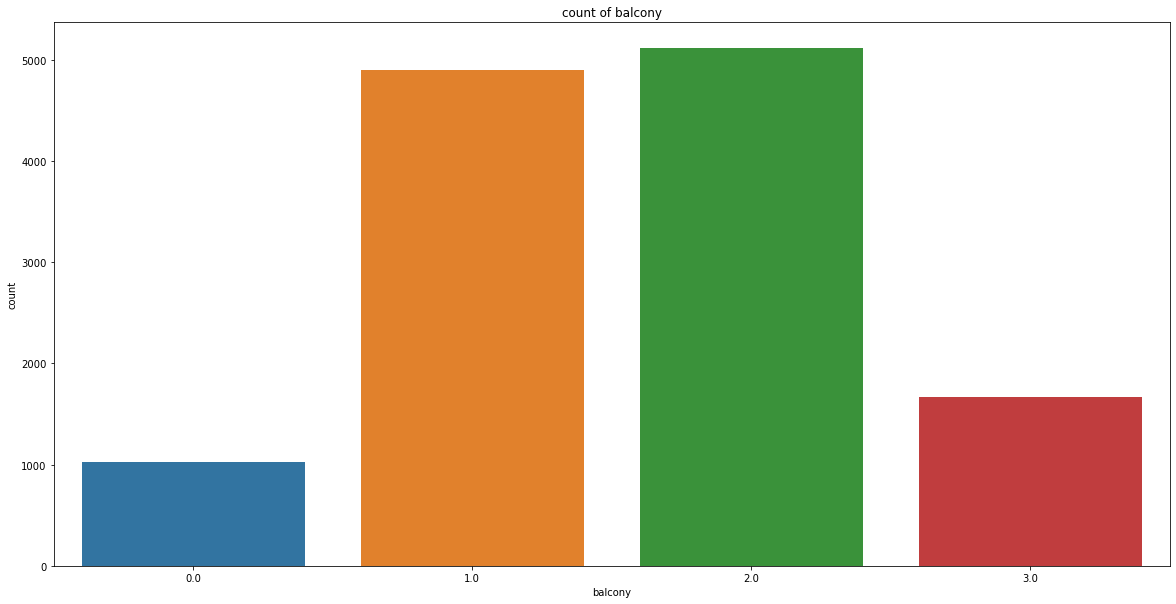

In [398]:
sns.countplot(data=df, x='balcony')
plt.title('count of balcony')

### Price

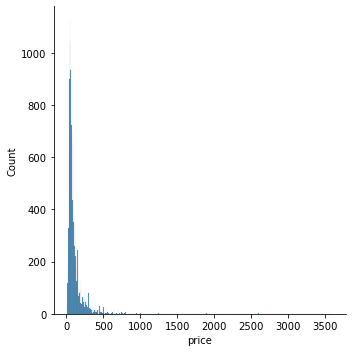

In [399]:
sns.displot(data=df, x='price')
# most of the values are within 500

# Data cleaning

In [400]:
org_df = df.copy() # making a copy for when we need it

# creating a new feature since size has different labels with the same meaning
df['rooms'] = df['size'].map(lambda x: int(x.split(' ')[0]), na_action='ignore')

# dropping columns that has high missing values and are not significant
df.drop(['area_type', 'society', 'balcony', 'availability', 'size'], axis=1, inplace=True)
df.head()

,location,total_sqft,bath,price,rooms
0,Electronic City Phase II,1056,2.0,39.07,2.0
1,Chikka Tirupathi,2600,5.0,120.00,4.0
2,Uttarahalli,1440,2.0,62.00,3.0
3,Lingadheeranahalli,1521,3.0,95.00,3.0
4,Kothanur,1200,2.0,51.00,2.0


In [401]:
df.isnull().sum()
# we could impute these values with median

location       1
total_sqft     0
bath          73
price          0
rooms         16
dtype: int64

In [402]:
df['rooms'] = df['rooms'].fillna(df['rooms'].median())
df['bath'] = df['bath'].fillna(df['bath'].median())
df.dropna(inplace=True)
df.isnull().sum()

location      0
total_sqft    0
bath          0
price         0
rooms         0
dtype: int64

In [403]:
df.head()

,location,total_sqft,bath,price,rooms
0,Electronic City Phase II,1056,2.0,39.07,2.0
1,Chikka Tirupathi,2600,5.0,120.00,4.0
2,Uttarahalli,1440,2.0,62.00,3.0
3,Lingadheeranahalli,1521,3.0,95.00,3.0
4,Kothanur,1200,2.0,51.00,2.0


In [404]:
# converting range values to single float
def convert_num(x):
    tokens = str(x).split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    if x.isnumeric():
        return float(x)
    else:
        return None

df['total_sqft'] = df['total_sqft'].map(convert_num)   
df.loc[30] # this index had the value as a range

location      Yelahanka
total_sqft       2475.0
bath                4.0
price             186.0
rooms               4.0
Name: 30, dtype: object

In [405]:
# this feature has high cardinatlity
df['location'].value_counts()

Whitefield                         540
Sarjapur  Road                     399
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
Viviani Road                         1
Narayanappa Layout                   1
Nagarbhavi Garden Villas Layout      1
LIC Colony                           1
SARJAPUR BAGALUR ROAD                1
Name: location, Length: 1305, dtype: int64

In [406]:
df['location'] = df['location'].map(lambda x: x.strip())
location = df['location'].value_counts(sort=True, ascending=False)
print(f'Total number of unique values in location: {len(location)}')
print(f'Number of location where the count is < 10: {len(location[location<=10])}')

Total number of unique values in location: 1294
Number of location where the count is < 10: 1053


In [407]:
# reducing the cardinality of location feature by labeling less frequent data as other
location_less_10 = location[location<=10]
df['location'] = df['location'].map(lambda x: 'other' if x in location_less_10 else x)
df['location'].nunique()

242

In [408]:
# creating new feature which would come handy in outlier detection
df['price_per_room'] = df['price']*100000/df['rooms']
df['price_per_sqft'] = df['price']*100000/df['total_sqft']
print(df['price_per_room'].describe(), df['price_per_sqft'].describe(), sep='\n\n')

count    1.331900e+04
mean     3.802636e+06
std      3.639627e+06
min      2.813333e+05
25%      2.166667e+06
50%      2.900000e+06
75%      4.100000e+06
max      7.500000e+07
Name: price_per_room, dtype: float64

count    1.318600e+04
mean     7.907677e+03
std      1.067837e+05
min      2.678298e+02
25%      4.262295e+03
50%      5.419778e+03
75%      7.294732e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64


In [409]:
# removing outliers based on price_per_room
from scipy.stats import zscore

def remove_outliers(df):
    ex_ind = np.array([])
    for loc, loc_df in df.groupby('location'):
        z = np.abs(zscore(loc_df['price_per_room']))
        cur_df = loc_df[z>1]
        ex_ind = np.append(ex_ind, cur_df.index.values)
    return df.drop(index=ex_ind)

df2 = remove_outliers(df)
df2.shape

(11206, 7)

In [410]:
df2['price_per_room'].describe()

count    1.120600e+04
mean     3.252532e+06
std      1.796478e+06
min      6.125000e+05
25%      2.166667e+06
50%      2.800000e+06
75%      3.766667e+06
max      3.125000e+07
Name: price_per_room, dtype: float64

In [411]:
df2.head()

,location,total_sqft,bath,price,rooms,price_per_room,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2.0,1.953500e+06,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0,3.000000e+06,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3.0,2.066667e+06,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0,3.166667e+06,6245.890861
4,Kothanur,1200.0,2.0,51.00,2.0,2.550000e+06,4250.000000


In [412]:
# there are outliers in bath as well
df2['bath'].quantile(0.97)

6.0

In [413]:
# removed outliers which had only one record with bathrooms above 12
df2 = df2.drop(index=df2[df2['bath']>12].index)
df2['bath'].value_counts()

2.0     6237
3.0     2803
4.0      847
1.0      625
5.0      336
6.0      177
7.0       72
8.0       49
9.0       34
10.0      10
12.0       6
11.0       2
Name: bath, dtype: int64

In [414]:
df2['rooms'].describe()

count    11198.000000
mean         2.721647
std          1.155630
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         12.000000
Name: rooms, dtype: float64

In [415]:
df2['rooms'].quantile(0.9)

4.0

In [416]:
df2['rooms'].value_counts()

2.0     5010
3.0     4129
4.0      907
1.0      523
5.0      258
6.0      171
7.0       75
8.0       69
9.0       40
10.0      11
11.0       4
12.0       1
Name: rooms, dtype: int64

In [417]:
# removing room outliers per location
def remove_room_outliers(df):
    drop_ind = np.array([])

    for loc, loc_df in df.groupby('location'):
        price_by_room = {room: [np.mean(room_df['price_per_sqft']), room_df.shape[0]] for room, room_df in loc_df.groupby('rooms') if room in [1,2,3,4]}

        for room, room_df in loc_df.groupby('rooms'):
            prev_room = price_by_room.get(room-1)
            if prev_room and prev_room[1]>5:
                drop_ind = np.append(drop_ind, room_df[(room_df['price_per_sqft']<prev_room[0])].index.values)
    return df.drop(index=drop_ind)

df3 = remove_room_outliers(df2)
df3.shape

(8051, 7)

In [418]:
# dropping rows where bath succeeds rooms by 2
df4 = df3[df3['bath']<df3['rooms']+2].dropna()
df4.shape

(7882, 7)

In [419]:
# one hot encoding categorical variables
data = pd.get_dummies(df4, prefix='', prefix_sep='').drop(['other','price_per_room', 'price_per_sqft'], axis=1)
data.shape

(7882, 245)

In [420]:
data.isnull().sum().sum()

0

In [421]:
# splitting data into target and predictor variables
data = data.sample(frac=1).reset_index(drop=True)

X = data.drop('price', axis=1, )
y = data['price'].values

print(X.shape, y.shape)

(7882, 244) (7882,)


In [422]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8, random_state=200)

# Modeling

In [423]:
# function to evaluate models
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

def eval_model(model):
    score = cross_val_score(model, xtrain, ytrain, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')

    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    mse = mean_squared_error(ytest, ypred)
    mae = mean_absolute_error(ytest, ypred)
    r_square = model.score(xtest, ytest)

    print('Cross validation MAE: ', -1*score.mean())
    print('MAE: ', mae.mean())
    print('RMSE: ', np.sqrt(mse))
    print('R_square: ', r_square)
    

In [424]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
eval_model(lr)

Cross validation MAE:  22.3895717831547
MAE:  22.35135726683607
RMSE:  66.41184240566066
R_square:  0.13756074729283962


In [425]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
eval_model(gbr)

Cross validation MAE:  22.903520818160835
MAE:  21.955617966930536
RMSE:  36.25659636545333
R_square:  0.742953603031463


In [426]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
eval_model(rf)

Cross validation MAE:  23.615808798160312
MAE:  22.59121521649528
RMSE:  37.71543940780658
R_square:  0.721852089984133


In [427]:
from xgboost import XGBRegressor

xgr = XGBRegressor()
eval_model(xgr)

Cross validation MAE:  20.08608714529184
MAE:  19.056177834587608
RMSE:  32.801156516733144
R_square:  0.7896145165433286


## Hyper-parameter tuning

In [428]:
# manual tuning
xgr = XGBRegressor(
    max_depth=8,
    subsample=1,
    min_child_weight=1,
    learning_rate=0.4,
)
xgr.fit(xtrain, ytrain, early_stopping_rounds=20, eval_set=[(xtest, ytest)], verbose=False)
ypred = xgr.predict(xtest)
print('MAE: ', mean_absolute_error(ytest, ypred))
print('Cross_val: ', cross_val_score(xgr, X, y, cv=5))
print('r2: ', xgr.score(xtest, ytest))

MAE:  18.15231981015009
Cross_val:  [0.75768524 0.81170024 0.7402536  0.76909603 0.75106869]
r2:  0.8006298281134802


In [429]:
# converting to dmatrix to make training faster
import xgboost as xgb

dtrain = xgb.DMatrix(xtrain, label=ytrain)
dtest = xgb.DMatrix(xtest, label=ytest)

In [430]:
import re

def objective(trial):
    learning_rate = trial.suggest_loguniform('learning_rate', 0.0001, 10.0)
    max_depth = trial.suggest_int('max_depth', 2, 10)
    reg_alpha = trial.suggest_loguniform('reg_alpha', 0.0001, 10.0)
    reg_lambda = trial.suggest_loguniform('reg_lambda', 0.0001, 10.0)

    params = {
        'learning_rate': learning_rate,
        'max_depth': max_depth,
        'alpha': reg_alpha,
        'lambda': reg_lambda,
    }

    model = xgb.train(
        params,
        dtrain,
        num_boost_round=100,
        evals=[(dtest, 'eval')],
        early_stopping_rounds=10,
        verbose_eval=0
    )

    result = model.eval(dtest)
    rmse = np.float64(re.search(r'[\d.]+$', result).group(0))
    return rmse

In [431]:
study = optuna.create_study()
study.optimize(objective, n_trials=100)

[I 2022-01-05 23:20:09,977] A new study created in memory with name: no-name-af5349cf-0427-41bc-adbe-847f5120af84
[I 2022-01-05 23:20:10,405] Trial 0 finished with value: 34.643013 and parameters: {'learning_rate': 0.6578511031586304, 'max_depth': 7, 'reg_alpha': 0.00016590423821730642, 'reg_lambda': 0.003984847318368059}. Best is trial 0 with value: 34.643013.
[I 2022-01-05 23:20:11,539] Trial 1 finished with value: 37.099274 and parameters: {'learning_rate': 0.02362433824843256, 'max_depth': 8, 'reg_alpha': 0.11245602764204676, 'reg_lambda': 0.01232531276661543}. Best is trial 0 with value: 34.643013.
[I 2022-01-05 23:20:12,821] Trial 2 finished with value: 84.860931 and parameters: {'learning_rate': 0.003743001644250395, 'max_depth': 9, 'reg_alpha': 0.21956918611075604, 'reg_lambda': 0.02169917737101544}. Best is trial 0 with value: 34.643013.
[I 2022-01-05 23:20:12,909] Trial 3 finished with value: 205290704.0 and parameters: {'learning_rate': 4.731071558902764, 'max_depth': 5, 're

In [432]:
study.best_params

{'learning_rate': 0.5136871044790982,
 'max_depth': 5,
 'reg_alpha': 6.748368941467777,
 'reg_lambda': 5.3731276139667425}

In [433]:
# to get the optimium number of n_estimators
xgb.train(study.best_params, dtrain, num_boost_round=600, evals=[(dtest, 'eval')], early_stopping_rounds=20, verbose_eval=1)

[0]	eval-rmse:68.26260
[1]	eval-rmse:47.74981
[2]	eval-rmse:40.08919
[3]	eval-rmse:37.13378
[4]	eval-rmse:36.16310
[5]	eval-rmse:35.69289
[6]	eval-rmse:35.30259
[7]	eval-rmse:35.14588
[8]	eval-rmse:34.98038
[9]	eval-rmse:34.87869
[10]	eval-rmse:34.83953
[11]	eval-rmse:34.65310
[12]	eval-rmse:34.62110
[13]	eval-rmse:34.54393
[14]	eval-rmse:34.35759
[15]	eval-rmse:34.24030
[16]	eval-rmse:34.31125
[17]	eval-rmse:34.26074
[18]	eval-rmse:34.15341
[19]	eval-rmse:34.02132
[20]	eval-rmse:34.02198
[21]	eval-rmse:34.11306
[22]	eval-rmse:34.01281
[23]	eval-rmse:33.86225
[24]	eval-rmse:33.73877
[25]	eval-rmse:33.63835
[26]	eval-rmse:33.69913
[27]	eval-rmse:33.69310
[28]	eval-rmse:33.65191
[29]	eval-rmse:33.55723
[30]	eval-rmse:33.52425
[31]	eval-rmse:33.50767
[32]	eval-rmse:33.42120
[33]	eval-rmse:33.37885
[34]	eval-rmse:33.47501
[35]	eval-rmse:33.47775
[36]	eval-rmse:33.44584
[37]	eval-rmse:33.41974
[38]	eval-rmse:33.41717
[39]	eval-rmse:33.26380
[40]	eval-rmse:33.24505
[41]	eval-rmse:33.23815
[4

In [436]:
xgr = xgb.XGBRegressor(**study.best_params, n_estimators=165)
xgr.fit(xtrain, ytrain)
xgr.score(xtest, ytest)

0.8092699571032654

In [437]:
def predict_price(location, sqft, bath, rooms):
    x = [0]*len(X.columns)

    if location in X.columns:
        loc_ind = X.columns.get_loc(location)
    else:
        loc_ind = -1
    
    x[0], x[1], x[2], x[loc_ind] = sqft, bath, rooms, 1
    pred = pd.DataFrame([x], columns=X.columns)
    
    return xgr.predict(pred)[0]

In [438]:
# testing the predict function
predict_price('1st Phase JP Nagar', 1000, 2, 2)

66.68875

In [441]:
# saving files 
import pickle 
import json

with open('house_price_model.pickle', 'wb') as f:
    pickle.dump(xgr, f)

columns = {'columns': [col.lower() for col in X.columns]}

with open('columns.json', 'w') as f:
    json.dump(columns, f)